                                                text     category
0  091139 114 1993apr5 823 ability absence advanc...  alt.atheism
1  3553 408 428 births centigram communications c...  alt.atheism
2  believing blashephemers damnation hell jsn104 ...  alt.atheism
3  21 41 734068710 85721 apparent arizona arizvms...  alt.atheism
4  013657 1993apr6 37 5691 ability absolute absur...  alt.atheism
TF-IDF Feature Classification Report：
                        precision    recall  f1-score   support

           alt.atheism       1.00      0.98      0.99       161
         comp.graphics       0.99      0.98      0.99       169
               sci.med       0.96      0.99      0.97       172
soc.religion.christian       0.97      0.98      0.97       176

              accuracy                           0.98       678
             macro avg       0.98      0.98      0.98       678
          weighted avg       0.98      0.98      0.98       678

TF-IDF Accuracy: 0.9793510324483776

Word frequency

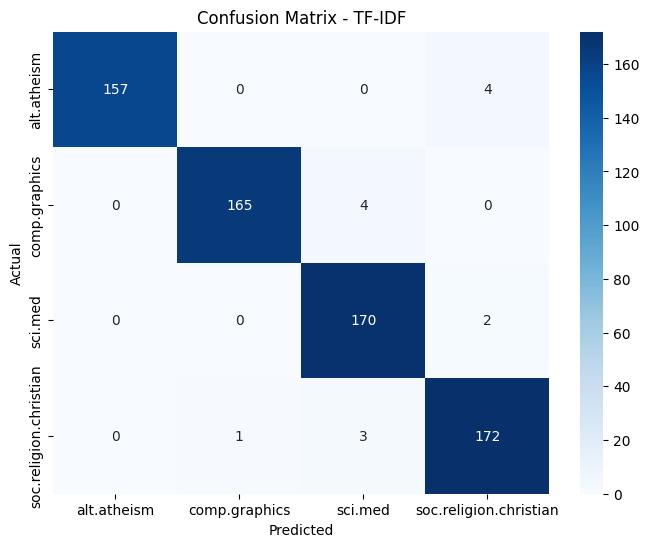

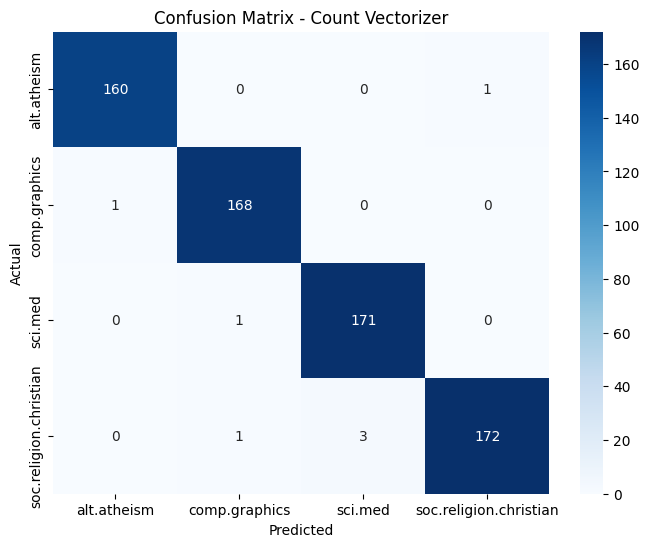

In [5]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns

def clean_text(text):
    text = re.sub(r'\t|\n', ' ', text)
    return text

file_paths = [
    r"/content/td_freq_db_alt_atheism.csv",
    r"/content/td_freq_db_comp_graphics.csv",
    r"/content/td_freq_db_sci_med.csv",
    r"/content/td_freq_db_soc_religion_christian.csv"
]

categories = ['alt.atheism', 'comp.graphics', 'sci.med', 'soc.religion.christian']

dataframes = []
for path, category in zip(file_paths, categories):
    df = pd.read_csv(path, header=None, names=['text'])
    df['text'] = df['text'].apply(clean_text)
    df['category'] = category
    dataframes.append(df)

data = pd.concat(dataframes, ignore_index=True)

print(data.head())

tfidf_vect = TfidfVectorizer(stop_words='english', max_df=0.95, min_df=2)
X_tfidf = tfidf_vect.fit_transform(data['text'])

count_vect = CountVectorizer(stop_words='english', max_df=0.95, min_df=2)
X_counts = count_vect.fit_transform(data['text'])

X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X_tfidf, data['category'], test_size=0.3, random_state=42)
X_train_counts, X_test_counts, _, _ = train_test_split(X_counts, data['category'], test_size=0.3, random_state=42)

nb_tfidf = MultinomialNB()
nb_tfidf.fit(X_train_tfidf, y_train)

nb_counts = MultinomialNB()
nb_counts.fit(X_train_counts, y_train)

y_pred_tfidf = nb_tfidf.predict(X_test_tfidf)
y_pred_counts = nb_counts.predict(X_test_counts)

print("TF-IDF Feature Classification Report：")
print(classification_report(y_test, y_pred_tfidf))
print(f"TF-IDF Accuracy: {accuracy_score(y_test, y_pred_tfidf)}\n")

print("Word frequency feature classification report：")
print(classification_report(y_test, y_pred_counts))
print(f"Word frequency feature accuracy: {accuracy_score(y_test, y_pred_counts)}\n")
# 8. Visualize classification results - confusion matrix
def plot_confusion_matrix(y_test, y_pred, title):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=categories, yticklabels=categories)
    plt.title(title)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

# Visualize the mixture matrix of TF-IDF and word frequency features
plot_confusion_matrix(y_test, y_pred_tfidf, 'Confusion Matrix - TF-IDF')
plot_confusion_matrix(y_test, y_pred_counts, 'Confusion Matrix - Count Vectorizer')


